## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns # Import Seaborn

# Load the data using Pandas

In [ ]:
# import data from the GSS
# Define file path
file_path = "/content/GSS.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

In [ ]:
print(df.head())

   year  id_               hrs2        marital childs age     sex  \
0  1990    1  .i:  Inapplicable  Never married      0  65  FEMALE   
1  1990    2  .i:  Inapplicable  Never married      0  42    MALE   
2  1990    3  .i:  Inapplicable  Never married      0  25    MALE   
3  1990    4  .i:  Inapplicable  Never married      0  39  FEMALE   
4  1990    5  .i:  Inapplicable  Never married      6  55    MALE   

          happy             hapmar               life    ballot  
0  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
1    Very happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
2  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
3  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
4  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  


In [ ]:
# see information about df, ensure that all variables I want are there
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables

(47497, 11) 

year        int64
id_         int64
hrs2       object
marital    object
childs     object
age        object
sex        object
happy      object
hapmar     object
life       object
ballot     object
dtype: object 



**Q2: Describe the data you chose and why**

When initially exploring the data on the website, the first variable that caught my attention was General Happiness. This variable represents responses to a question asking participants how they would describe their overall happiness, with answer choices of Very happy, Pretty happy, or Not too happy. This piqued my interest in exploring other lifestyle factors to see how they might influence respondents' assessments of their general happiness. Additionally, I wanted to examine whether ratings of general happiness followed any trends over time. I selected data from 1990 to 2022, as I felt that a 32-year span would provide a meaningful timeframe to observe trends in happiness alongside other influencing variables. Beyond the General Happiness variable, I also examined the "Is Life Exciting or Dull" variable. As the name suggests, this question asks respondents whether they feel their life is Exciting, Routine, or Dull. Similarly, I was interested in seeing how different perceived levels of excitement in life correlated with various lifestyle factors.

One area that particularly interested me was marital and family factors. I chose to analyze Marital Status, Happiness of Marriage, and Number of Children to see how these aspects relate to general happiness. For marital status, respondents could select from options of: Married, Widowed, Divorced, Separated, or Never Married. The Happiness of Marriage variable mirrors the General Happiness variable, offering responses of Very happy, Pretty happy, or Not too happy to describe their marriage. However, those who were not married could select Inapplicable. The Number of Children variable is a straightforward numeric measure, ranging from 0 to 8 or more, with any values above 8 grouped into a single category.

Beyond family and relationships, I also explored work-life factors, particularly the Number of Hours one usually works in a week. To gain additional insights, I included basic demographic variables such as Age and Sex. I wanted to examine whether and how these demographic factors influenced general happiness, marital happiness, and other selected variables.

# Clean the data

Most of the variables have various different labels on data inputs that are along the lines of "Don't Know" or "Skipped", and for those I would like to put all of those towgtehr into one sort of "No Answer" catgeory unless the idfferentiation between the reasons there is no answer is actually important. Another main strategy I want to use to clean the data is to coerce the numeric variables that are currently obejct types to actually be numeric so that I can make meaningful summaries and visualizations with them.

## Clean gender variable

In [ ]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



In [ ]:
df["sex"] = df["sex"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' 'No Answer'] 



## Clean age variable

In [ ]:
# need to account for age 89 or older
df['age'] = df['age'].replace('89 or older', '89')

In [ ]:
# coerce age variable to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [ ]:
print('Age variable summary: \n', df['age'].describe(),'\n')

Age variable summary: 
 count    46839.000000
mean        47.477423
std         17.482017
min         18.000000
25%         33.000000
50%         46.000000
75%         61.000000
max         89.000000
Name: age, dtype: float64 



## Clean child variable

In [ ]:
print(df['childs'].unique(),'\n') # list of unique values
print(df['childs'].value_counts(), '\n') # number of times each unique value occurs

['0' '6' '2' '3' '5' '1' '4' '.d:  Do not Know/Cannot Choose' '8 or more'
 '7' '.n:  No answer' '.s:  Skipped on Web' '.i:  Inapplicable'] 

childs
0                                 13350
2                                 12401
1                                  7596
3                                  7393
4                                  3586
5                                  1458
6                                   721
8 or more                           444
7                                   375
.d:  Do not Know/Cannot Choose      113
.n:  No answer                       33
.i:  Inapplicable                    16
.s:  Skipped on Web                  11
Name: count, dtype: int64 



In [ ]:
# need to account for number of children 8 or more, changing to 8 so still retained when coerce
df['childs'] = df['childs'].replace('8 or more', '8')

In [ ]:
# coerce number of children to numeric
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')

In [ ]:
print(df['childs'].unique(),'\n') # list of unique values

[ 0.  6.  2.  3.  5.  1.  4. nan  8.  7.] 



In [ ]:
print('# of Children variable summary: \n', df['childs'].describe(),'\n')

# of Children variable summary: 
 count    47324.000000
mean         1.832347
std          1.666458
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: childs, dtype: float64 



## Clean number hours work per week variable

In [ ]:
# number of hours usually work a week should also be numeric, need to account for non-numeric answers
df['hrs2'] = df['hrs2'].replace('89+ hrs', '89')

In [ ]:
# coerce number of children to numeric
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')

## Clean general happiness variable

In [ ]:
# clean general happiness, want to put all "No answer" type of answers as one category
df["happy"] = df["happy"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
print(df['happy'].unique(),'\n')

['Pretty happy' 'Very happy' 'Not too happy' 'No Answer'] 



## Clean marital happiness variable

In [ ]:
# clean marital happiness, want to put the "Don't Know" and "Skipped" into one catgeory
# and have Inapplicable still be its own catgeory (bc that would mean those ppl aren't married and that is still important)
df['hapmar'] = df['hapmar'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
df['hapmar'] = df['hapmar'].replace('.i:  Inapplicable', 'Inapplicable')

In [ ]:
print(df['hapmar'].unique(),'\n')

['Inapplicable' 'VERY HAPPY' 'PRETTY HAPPY' 'NOT TOO HAPPY' 'No Answer'] 



## Clean marital status variable

In [ ]:
# clean marital status - make one category for all "No answer" answers
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated' 'No Answer'] 



In [ ]:
df['marital'] = df['marital'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated' 'No Answer'] 



## Clean exciting/dull life variable

In [ ]:
print(df['life'].unique(),'\n')

['.i:  Inapplicable' 'Exciting' 'Routine' '.d:  Do not Know/Cannot Choose'
 'Dull' '.n:  No answer' '.s:  Skipped on Web'] 



In [ ]:
df['life'] = df['life'].replace(['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
print(df['life'].unique(),'\n')

['No Answer' 'Exciting' 'Routine' 'Dull'] 



# Numeric Summaries and Visualizations

## Statistic descriptions and basic visualizations

### Usual Hours Worked per Week

In [ ]:
# Describe the usual hours worked per week variable, see some calculated measures of tendency
print('Usual # of hours/week worked variable summary: \n', df['hrs2'].describe(),'\n')

Usual # of hours/week worked variable summary: 
 count    919.000000
mean      38.648531
std       13.484982
min        0.000000
25%       35.000000
50%       40.000000
75%       45.000000
max       89.000000
Name: hrs2, dtype: float64 



### Marital Status

In [ ]:
# explore marital status
print(df['marital'].value_counts())

marital
Married          22461
Never married    11784
Divorced          7467
Widowed           4178
Separated         1558
No Answer           49
Name: count, dtype: int64


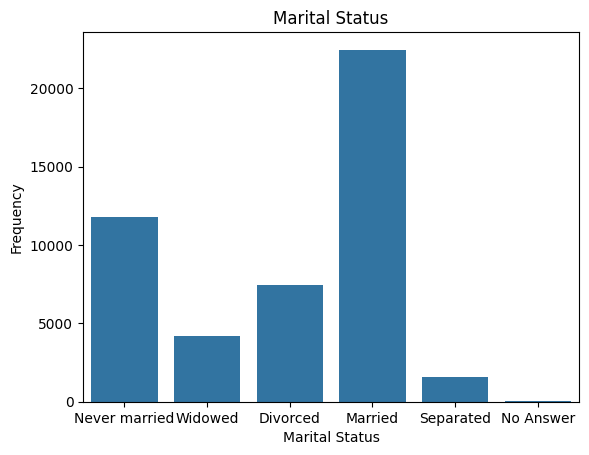

In [ ]:
var = 'marital'
sns.countplot(x=var, data=df)

plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.show()

### Age

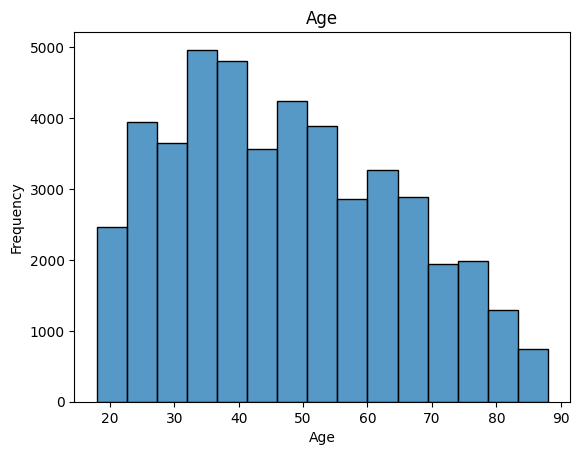

In [ ]:
# explore distribution of age variable
var = 'age'
sns.histplot(df[var], bins=15)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### General happiness levels

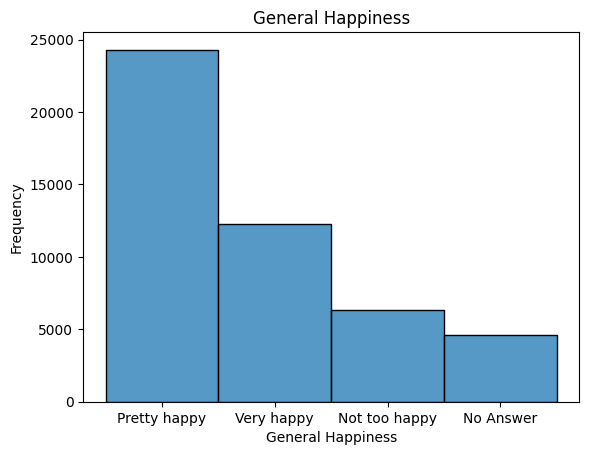

In [ ]:
# Counts of levels of general happiness: Very happy, Pretty happy, or Not too happy
var = 'happy'
sns.histplot(df[var], bins=15)

plt.title('General Happiness')
plt.xlabel('General Happiness')
plt.ylabel('Frequency')

plt.show()

### Is life exciting, routine, or dull?

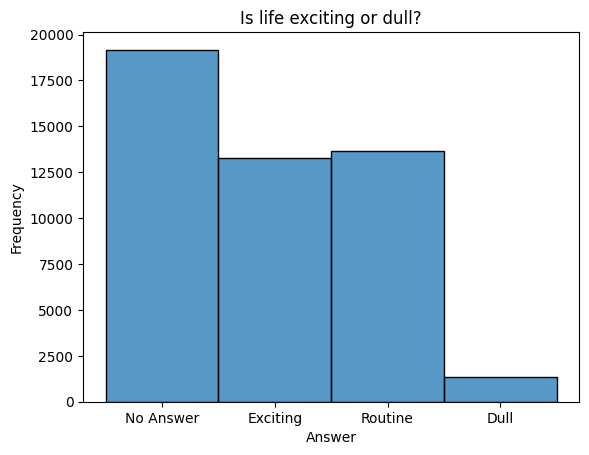

In [ ]:
# Counts of whether life is: Exciting, Routine, or Dull
var = 'life'
sns.histplot(df[var], bins=15)

plt.title('Is life exciting or dull?')
plt.xlabel('Answer')
plt.ylabel('Frequency')

plt.show()

## Happiness across ages

[Text(0.5, 1.0, 'Grouped KDE Plot General Happiness Across Age')]

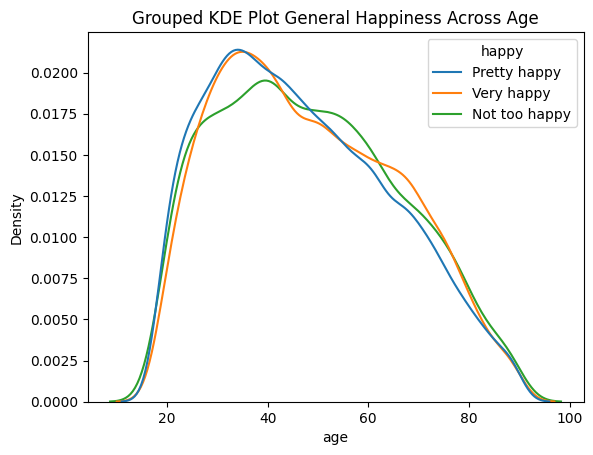

In [ ]:
# Show at what age were people happiest?
# Filter out 'No Answer' category
df_happy = df[df['happy'] != 'No Answer']

conditioning = 'happy'
var = 'age'
sns.kdeplot( data=df_happy, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot General Happiness Across Age')

[Text(0.5, 1.0, 'Grouped KDE Plot General Happiness Across Age')]

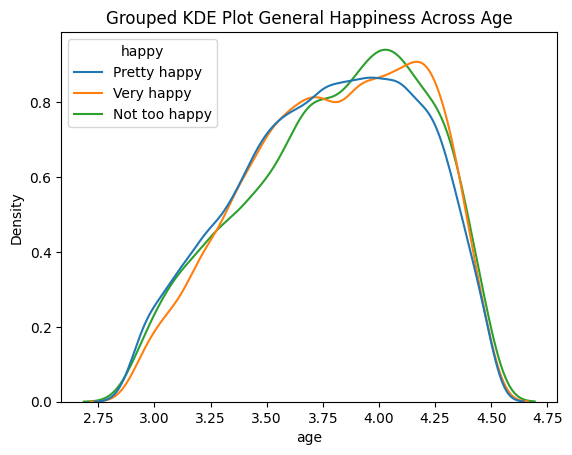

In [ ]:
# Show at what age were people happiest?
# Filter out 'No Answer' category
df_happy = df[df['happy'] != 'No Answer']

conditioning = 'happy'
var = 'age'
sns.kdeplot( data=df_happy, x=np.log(df_happy[var]), hue=conditioning, common_norm=False).set(title='Grouped KDE Plot General Happiness Across Age')

<ipython-input-112-5f5bcb9ecdf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_happy, x='happy', y='age', order=['Not too happy', 'Pretty happy', 'Very happy'], palette="bright")


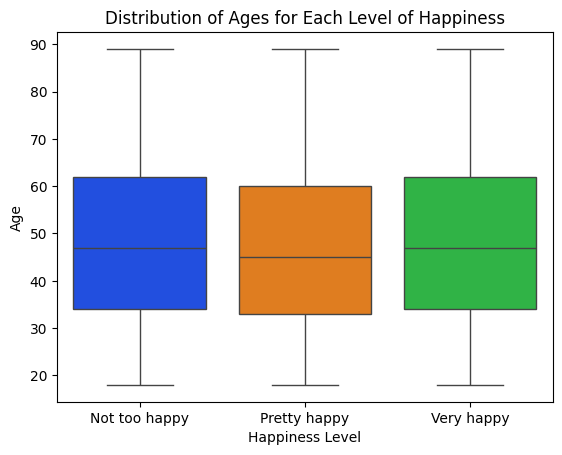

In [ ]:
# boxplot showing distribution of ages for each level of happiness
sns.boxplot(data=df_happy, x='happy', y='age', order=['Not too happy', 'Pretty happy', 'Very happy'], palette="bright")

# Labels and title
plt.xlabel("Happiness Level")
plt.ylabel("Age")
plt.title("Distribution of Ages for Each Level of Happiness")

# Show the plot
plt.show()

## Children and Happiness

In [ ]:
# cross tab number of children and marital happiness
pd.crosstab(df['childs'], df['hapmar'])

hapmar,Inapplicable,NOT TOO HAPPY,No Answer,PRETTY HAPPY,VERY HAPPY
childs,,,,,
0.0,10482,63,22,815,1968
1.0,4234,103,30,1176,2053
2.0,5426,220,36,2507,4212
3.0,3513,137,16,1370,2357
4.0,1799,63,17,650,1057
5.0,759,30,4,254,411
6.0,421,17,5,113,165
7.0,206,6,1,63,99
8.0,281,9,2,57,95


### Do number of children and usual work hours have an affect on marital happiness?

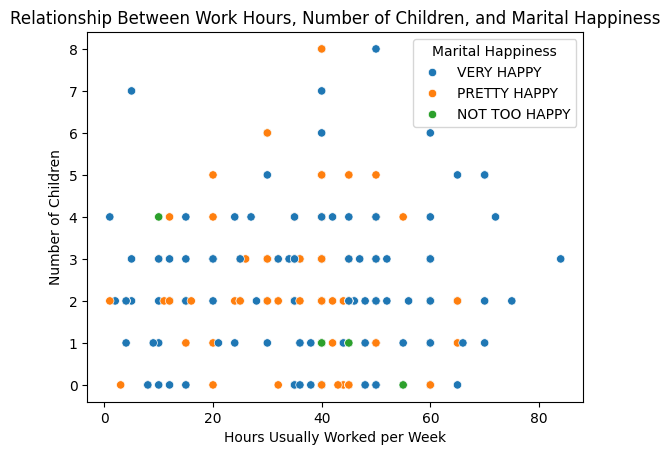

In [ ]:
# dont want to show where inapplicable or no answer
df_hapmar_filter = df[~df['hapmar'].isin(['Inapplicable', 'No Answer'])]

# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_hapmar_filter, x='hrs2', y='childs', hue='hapmar')

# Labels and title
plt.xlabel("Hours Usually Worked per Week")
plt.ylabel("Number of Children")
plt.title("Relationship Between Work Hours, Number of Children, and Marital Happiness")

plt.legend(title="Marital Happiness")
plt.show()

### On general happiness?

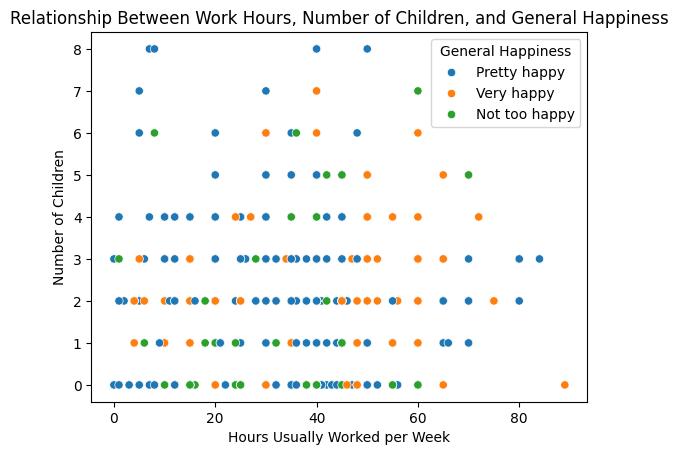

In [ ]:
# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_happy, x='hrs2', y='childs', hue='happy')

# Labels and title
plt.xlabel("Hours Usually Worked per Week")
plt.ylabel("Number of Children")
plt.title("Relationship Between Work Hours, Number of Children, and General Happiness")

plt.legend(title="General Happiness")
plt.show()

In [ ]:
# is life exciting, routine, or dull - on age and hours working

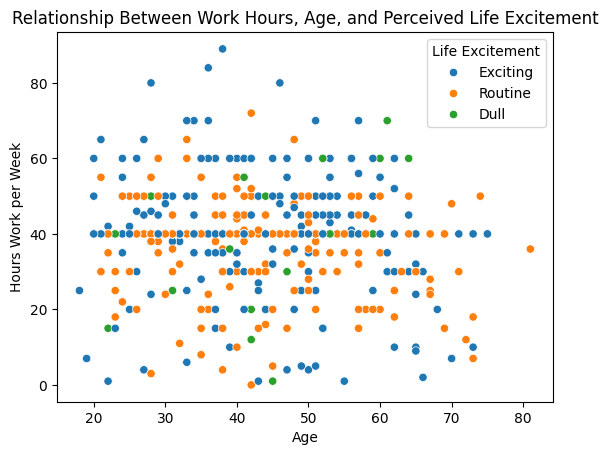

In [ ]:
# dont want to show where no answer
df_life_filter = df[~df['life'].isin(['No Answer'])]

# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_life_filter, x='age', y='hrs2', hue='life')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Hours Work per Week")
plt.title("Relationship Between Work Hours, Age, and Perceived Life Excitement")

plt.legend(title="Life Excitement")
plt.show()

## Gender and happiness

In [ ]:
# cross tab sex with general happiness
pd.crosstab(df_happy['sex'], df['happy'])

happy,Not too happy,Pretty happy,Very happy
sex,,,
FEMALE,3545,13450,6800
MALE,2750,10780,5452
No Answer,17,73,21


Female proportions:
* Not too happy: ~15%
* Pretty happy: ~56%
* Very happy: ~28%

Male proportions:
* Not too happy: ~14%
* Pretty happy: ~56%
* Very happy: ~28%

In [ ]:
# cross tab sex with marital happiness
df_hapmar_filter = df[~df['hapmar'].isin(['No Answer', 'Inapplicable'])]
pd.crosstab(df_hapmar_filter['sex'], df['hapmar'])

hapmar,NOT TOO HAPPY,PRETTY HAPPY,VERY HAPPY
sex,,,
FEMALE,397,3778,6281
MALE,252,3224,6136
No Answer,0,18,33


Female proportions:
* Not too happy: ~3%
* Pretty happy: ~36%
* Very happy: ~60%

Male proportions:
* Not too happy: ~2%
* Pretty happy: ~33%
* Very happy: ~63%

## Happiness levels over time

In [ ]:
# visualization: over the years, have people gotten happier in general?
# see just number of people that say "Very happy" and "Not too happy" to see both extremes
# histogram and each bar is two colors - one showing number of "Very happy", one showing number of "Not too happy"
# Filter for only "Very happy" and "Not too happy"
df_very_hap = df[df['happy'].isin(['Very happy', 'Not too happy'])]

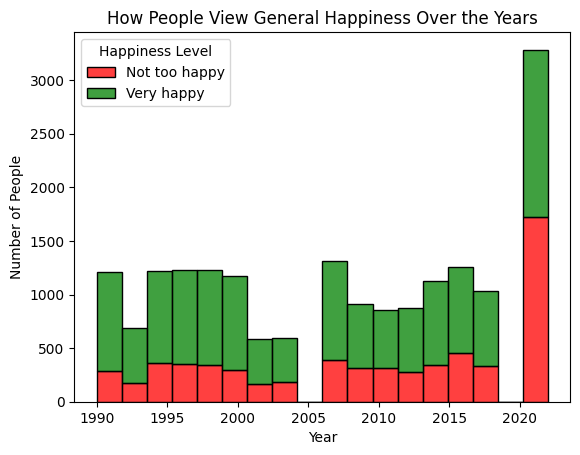

In [ ]:
sns.histplot(data=df_very_hap, x='year', hue='happy', multiple='stack', bins=len(df['year'].unique()),
             palette=['green', 'red']
             )

plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("How People View General Happiness Over the Years")
plt.legend(title="Happiness Level", labels=["Not too happy", "Very happy"])

plt.show()

**Q5: Describe your findings**

**Basic variable descriptions and variable count visualizations:**
The first step I took to explore the data was to conduct an initial review of the variables themselves. I wanted to see the different value counts before analyzing trends and patterns across multiple variables. To do this, I created histograms, count plots, and basic numeric summaries to further explore the dataset. One of the first variables I examined was Usual Number of Hours Worked per Week. The mean was approximately 38.65 hours, which aligns with the standard 40-hour workweek in most workplaces. However, I was surprised to find that the maximum value was 89. Upon closer inspection, I discovered that 89+ hours represents a category rather than an exact number, indicating an extremely long workweek. Next, I took a snapshot of the Marital Status variable by reviewing its value counts. The top three responses were: Married – the most common response by a large margin, Never Married, and then Divorced. Following these, Widowed and Separated were the next most frequent responses. I also examined the age distribution of survey respondents and found that the highest number of respondents were between 35 and 40 years old. This is an important factor to keep in mind for later visualizations, as it may influence trends in other variables.
Additionally, I created quick histogram snapshots of General Happiness and the "Is Life Exciting?" question to get an overview of their distributions. For General Happiness, the most common response was Pretty happy, significantly outnumbering Very happy and Not too happy. This makes sense, as it represents the middle option, which many people might consider a reasonable assessment of their happiness. However, for the "Is Life Exciting?" question, I expected Routine to be the clear majority response, but that wasn’t the case. While Routine had the highest count, it was only slightly higher than Exciting, whereas Dull was chosen far less frequently. I had assumed that most people would describe their lives as Routine rather than Exciting, but my assumption is not actually reflected in the data.

**Looking at levels of happiness across ages:**
Then, moving into visualizations to see more about trends and patterns in the data, I wanted to look at happiness levels across ages and see if there were any patterns. I created a grouped kernel density plot to see how each category of happiness changed across different age groups. It is clear that the density of responses is highest in the age range with the most respondents, but a possible trend is that levels of Pretty happy seem to reach a peak at around 35 and then decrease smoothly, while Very happy and Not too happy follow a more varying path as age increases. For example, levels of Not too happy seem to increase again even when the number of responses for that age group is lower, showing that Not too happy responses were definitely increasing at that age—particularly around age 55. A similar pattern appears for Very happy responses around ages 50 and 65. I also created this grouped KDE plot with log(age) on the x-axis to see if I could glean any more insights into how happiness levels change with age. This visualization suggests that Very happy levels may actually peak later in life, though Not too happy appears to peak just before that as well. Additionally, I examined the distribution of ages within each happiness level to see if it provided any further insight. However, the age distribution was extremely similar across all three happiness levels and didn’t reveal anything new.

**How children and working hours affect happiness:**
Next, I wanted to engage with the variable of number of children and see how that might affect happiness levels, both in general and in marriage. I did a cross-tabulation of marital happiness and number of children to see if there were any trends. For the frequency of Pretty happy and Very happy, both seem to reach their highest levels at two children and decrease after that. Then, I wanted to bring in usual work hours along with the number of children to see how both affect happiness levels reported by respondents. I created two scatterplots—one for the relationship between work hours, number of children, and general happiness, and another where the dependent variable is marital happiness. When looking at the marital happiness scatterplot, I noticed only a few Not too happy respondents, all in the 40–60 hours of work range. Very happy and Pretty happy responses are scattered throughout, but there is definitely a higher concentration in the lower mid-left area. There are very few respondents reporting Very happy or Pretty happy above the five-child level. Looking at the general happiness scatterplot, the responses are more widely distributed across the plot. However, there is a concentration of Pretty happy responses in the center, around 40 hours worked and 0 to 3 children. Finally, in this section, I created a scatterplot to examine work hours, number of children, and life excitement. I expected to see that the more hours someone worked, the more likely they would be to consider their life dull, but that is not quite what this plot shows. In fact, the most common response above 60 hours of work is Exciting.

**Gender and happiness:**
I also wanted to take a brief look at how respondent sex and happiness level might correlate, so I did a quick cross-tabulation of both sex and general happiness, as well as sex and marital happiness, to see what insights I could gather from the results. At first glance, it’s a bit hard to identify trends, as female respondents may simply outnumber male respondents, which could account for the higher response rate across all levels. I also calculated the response proportions within each gender to ensure I wasn’t missing anything, but the proportions were extremely similar. I’m not sure I can make any definitive judgments about happiness levels based on gender, which actually makes sense as I wouldn’t necessarily expect to see large differences solely based on gender. For marital happiness, the levels are a bit closer together, making it slightly easier to analyze. The proportion of male respondents who selected Very happy is close to the proportion of female respondents who did. However, when I calculated the percentage relative to the total number of respondents in each gender, I noticed a slight difference. The proportion of male respondents who chose Very happy is actually slightly higher than that of female respondents, whereas a higher percentage of female respondents selected Pretty happy instead.

**Happiness levels over time:**
The final visualization I wanted to explore was whether there was any trend in happiness levels over time. For this, I narrowed it down to just the frequencies of Very happy and Not too happy, the two opposite ends of the general happiness spectrum. When looking at proportions rather than absolute numbers, there is a clear increase in the frequency of Not too happy responses just after 2020. This is the first point where the proportion appears to be 50/50, rather than Very happy maintaining a proportion closer to ¾ or higher in relation to Not too happy.
